# Gamma Regression: Modeling Right-Skewed Continuous Data

## a. Deriving the Full Likelihood Function

### Step 1: Understanding the Gamma Distribution

Each $Y_i$ follows a Gamma distribution with shape parameter $\nu$ and rate parameter $\lambda_i$.

The probability density function (PDF) of $Y_i$ is:

$$
f(y_i | \nu, \lambda_i) = \frac{\lambda_i^\nu}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\lambda_i y_i}
$$

The expected value $\mu_i = \mathbb{E}[Y_i] = \frac{\nu}{\lambda_i}$, so $\lambda_i = \frac{\nu}{\mu_i}$

### Step 2: Substituting the Link Function

The link function is $\log(\mu_i) = x_i^\top \beta$, which implies:

$$
\mu_i = e^{x_i^\top \beta}
$$

Therefore, the rate parameter $\lambda_i$ can be written as:

$$
\lambda_i = \frac{\nu}{e^{x_i^\top \beta}}
$$

### Step 3: Writing the Likelihood Function

The likelihood function $L(\beta, \nu)$ is the product of the individual PDFs for all observed $y_i$:

$$
L(\beta, \nu) = \prod_{i=1}^n f(y_i | \nu, \lambda_i) = \prod_{i=1}^n \frac{\left(\frac{\nu}{e^{x_i^\top \beta}}\right)^\nu}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\left(\frac{\nu}{e^{x_i^\top \beta}}\right) y_i}
$$

Simplifying the expression:

$$
L(\beta, \nu) = \prod_{i=1}^n \frac{\nu^\nu e^{-\nu x_i^\top \beta}}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\nu y_i e^{-x_i^\top \beta}}
$$

$$
L(\beta, \nu) = \nu^{n \nu} \left(\prod_{i=1}^n \frac{1}{\Gamma(\nu)} y_i^{\nu - 1}\right) \exp\left(-\nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}\right)
$$

### Step 4: Final Likelihood Function

The full likelihood function for the observed data is:

$$
L(\beta, \nu) = \nu^{n \nu} \left(\prod_{i=1}^n \frac{y_i^{\nu - 1}}{\Gamma(\nu)}\right) \exp\left(-\nu \sum_{i=1}^n \left(x_i^\top \beta + y_i e^{-x_i^\top \beta}\right)\right)
$$

This is the likelihood function for the given Gamma regression model with the specified link function. The parameters to estimate are $\beta$ (the regression coefficients) and $\nu$ (the shape parameter of the Gamma distribution).

## b. Deriving the Log-Likelihood Function

Starting with our likelihood function:

$$
L(\beta, \nu) = \nu^{n \nu} \left(\prod_{i=1}^n \frac{y_i^{\nu - 1}}{\Gamma(\nu)}\right) \exp\left(-\nu \sum_{i=1}^n \left(x_i^\top \beta + y_i e^{-x_i^\top \beta}\right)\right)
$$

Taking the natural logarithm (let's denote log-likelihood as $\ell(\beta, \nu)$):

$$
\ell(\beta, \nu) = \ln(L(\beta, \nu))
$$

Using properties of logarithms:

1. $\ln(\nu^{n\nu}) = n\nu\ln(\nu)$
2. $\ln\left(\prod_{i=1}^n \frac{y_i^{\nu - 1}}{\Gamma(\nu)}\right) = \sum_{i=1}^n \ln(y_i^{\nu - 1}) - \sum_{i=1}^n \ln(\Gamma(\nu))$
3. $\ln(e^{x}) = x$

Therefore:

$$
\begin{align*}
\ell(\beta, \nu) &= n\nu\ln(\nu) + \sum_{i=1}^n (\nu - 1)\ln(y_i) - n\ln(\Gamma(\nu)) \\
&- \nu \sum_{i=1}^n \left(x_i^\top \beta + y_i e^{-x_i^\top \beta}\right)
\end{align*}
$$

This can be rearranged as:

$$
\ell(\beta, \nu) = n\nu\ln(\nu) - n\ln(\Gamma(\nu)) + (\nu - 1)\sum_{i=1}^n \ln(y_i) - \nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

This is the log-likelihood function for the Gamma regression model. To find the maximum likelihood estimates of $\beta$ and $\nu$, we would need to maximize this function by taking partial derivatives with respect to each parameter and setting them equal to zero.

## Deriving the Negative Log-Likelihood (NLL) as a function of β

Starting with our log-likelihood:

$$
\ell(\beta, \nu) = n\nu\ln(\nu) - n\ln(\Gamma(\nu)) + (\nu - 1)\sum_{i=1}^n \ln(y_i) - \nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

### Step 1: Identify terms not depending on β
Terms not depending on β are:
- $n\nu\ln(\nu)$
- $-n\ln(\Gamma(\nu))$
- $(\nu - 1)\sum_{i=1}^n \ln(y_i)$

### Step 2: Drop these terms and keep only β-dependent terms
The remaining terms are:
$$
-\nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

### Step 3: Negate to get the NLL
The Negative Log-Likelihood (up to terms not depending on β) is:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n x_i^\top \beta + \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

This is the expression we want to minimize with respect to β to find the maximum likelihood estimate.

## Proving Convexity of the Negative Log-Likelihood

### Starting Point
Our NLL function is:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n x_i^\top \beta + \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

### Proof of Convexity

#### 1. Basic Properties
- A function is convex if its Hessian matrix is positive semidefinite
- Sum of convex functions is convex
- Positive scalar multiplication preserves convexity

#### 2. Analyzing Components
Let's break down the NLL into two terms:
1. $f_1(\beta) = \nu \sum_{i=1}^n x_i^\top \beta$ (linear term)
2. $f_2(\beta) = \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}$ (exponential term)

#### 3. First Term Analysis
- $f_1(\beta)$ is a linear function
- Linear functions are both convex and concave
- The Hessian of $f_1(\beta)$ is zero (all second derivatives are zero)

#### 4. Second Term Analysis
- For $f_2(\beta)$, let's examine a single term: $\nu y_i e^{-x_i^\top \beta}$
- The composition of convex functions with specific properties preserves convexity
- $e^{-x}$ is convex for all x
- The negative of a linear function $(-x_i^\top \beta)$ is concave
- Composition of $e^x$ with a concave function is convex
- Multiplication by positive scalars ($\nu y_i > 0$ since both are positive) preserves convexity

#### 5. Sum of Terms
- $f_1(\beta)$ is convex (being linear)
- $f_2(\beta)$ is convex (from step 4)
- The sum of convex functions is convex

#### 6. Formal Verification through Hessian (Optional)
The Hessian matrix H of the NLL is:

$$
H = \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta} x_i x_i^\top
$$

This is positive semidefinite because:
- Each term $y_i e^{-x_i^\top \beta} x_i x_i^\top$ is positive semidefinite (outer product)
- $\nu > 0$ and $y_i > 0$
- Sum of positive semidefinite matrices is positive semidefinite

### Conclusion
The NLL is convex in β because:
1. It is the sum of a linear function (convex) and a sum of convex exponential functions
2. All components are convex and the combining operations (sum and positive scalar multiplication) preserve convexity
3. The Hessian is positive semidefinite

This convexity guarantees that any local minimum of the NLL is also a global minimum, making optimization more tractable.

# Implementaion

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 2: Load and Inspect the Data

In [4]:
# Read the data
df = pd.read_csv('gamma.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   int64  
 5   y       1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
None


In [5]:
print("\nFirst few rows:")
print(df.head())


First few rows:
         x1        x2        x3        x4  x5          y
0  3.352058  2.083493  0.575296  0.532679   1  14.457383
1  3.796435  1.854274  0.595645  1.158138   1   7.337961
2  1.752608  2.938654  0.458634  1.122724   0   1.637679
3  1.175234  2.236772  1.035738  2.108895   1   9.099828
4  1.820076  3.102281  0.692244 -2.329294   1   1.321441


In [6]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
                x1           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      3.025433     3.010198     0.794704     0.015902     0.589000   
std       1.112182     1.000166     0.394290     0.981481     0.492261   
min       1.000134     0.096149     0.102044    -3.525616     0.000000   
25%       2.047172     2.314324     0.468677    -0.636760     0.000000   
50%       3.017641     3.025743     0.796198    -0.028035     1.000000   
75%       3.972503     3.691170     1.131596     0.698384     1.000000   
max       4.998965     7.402141     1.497384     3.045147     1.000000   

                 y  
count  1000.000000  
mean      6.653052  
std       8.844500  
min       0.105442  
25%       1.925859  
50%       3.691055  
75%       7.587637  
max      87.750251  


## Step 3: Analyze Response Variable (Y)

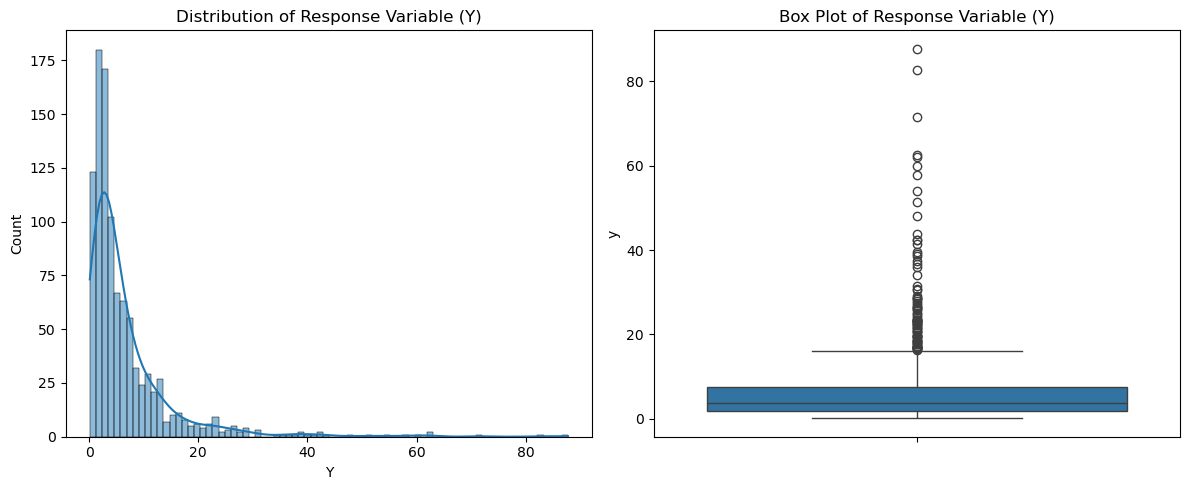


Skewness of Y: 4.036524071774891
Kurtosis of Y: 23.14927477472014


In [9]:
# Create figure with larger size
plt.figure(figsize=(12, 5))

# Plot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='y', kde=True)
plt.title('Distribution of Response Variable (Y)')
plt.xlabel('Y')
plt.ylabel('Count')

# Plot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['y'])
plt.title('Box Plot of Response Variable (Y)')

plt.tight_layout()
plt.show()

# Print skewness and kurtosis
print("\nSkewness of Y:", stats.skew(df['y']))
print("Kurtosis of Y:", stats.kurtosis(df['y']))

## Step 4: Analyze Relationships with Predictor Variables

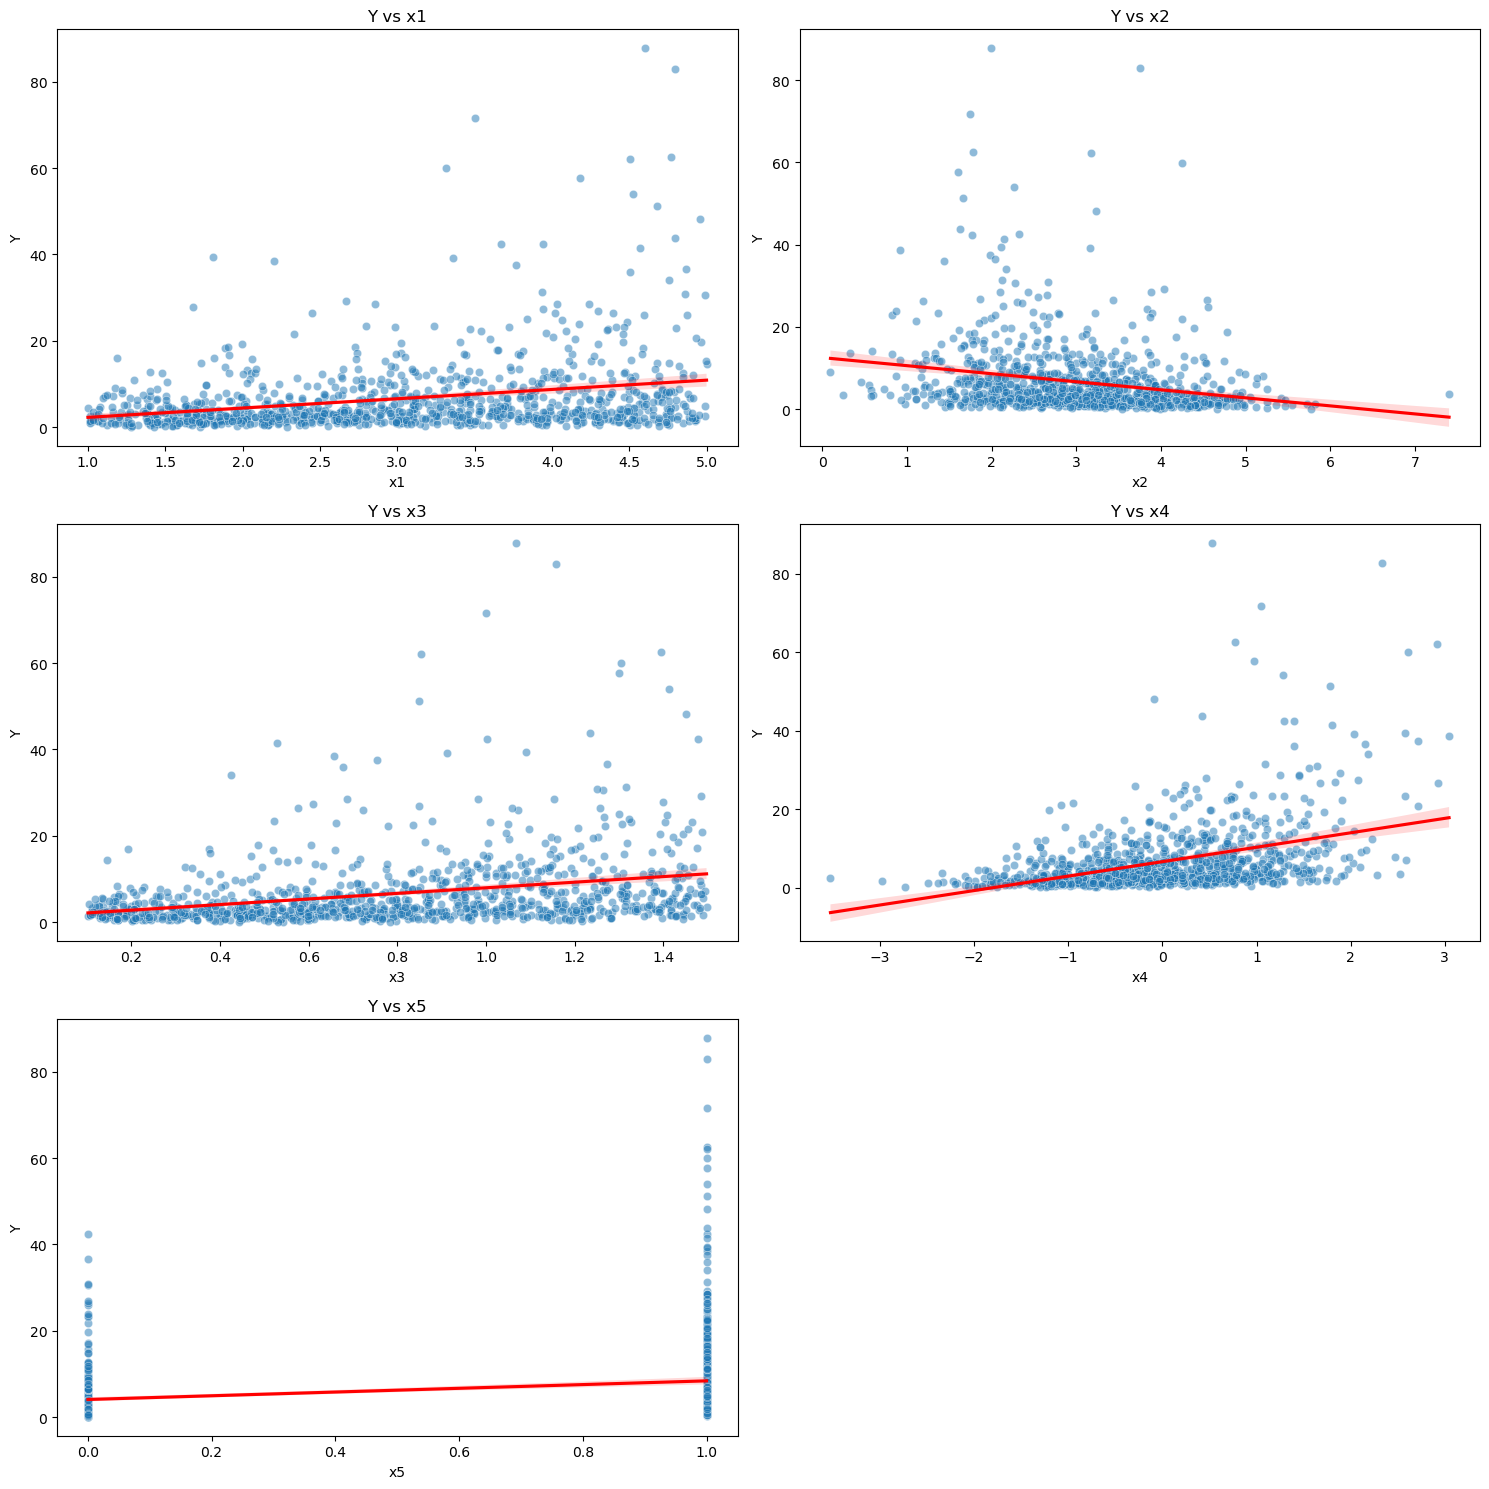


Correlations with Y:
y     1.000000
x4    0.408498
x3    0.288623
x1    0.270766
x5    0.240218
x2   -0.221095
Name: y, dtype: float64


In [14]:
# Get list of predictor variables (assuming all columns except 'Y' are predictors)
X_cols = [col for col in df.columns if col != 'y']

# Create scatter plots for each predictor
n_predictors = len(X_cols)
n_rows = (n_predictors + 1) // 2  # Calculate number of rows needed

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(X_cols, 1):
    plt.subplot(n_rows, 2, i)

    # Create scatter plot
    sns.scatterplot(data=df, x=col, y='y', alpha=0.5)

    # Add trend line
    sns.regplot(data=df, x=col, y='y', scatter=False, color='red')

    plt.title(f'Y vs {col}')
    plt.xlabel(col)
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = df.corr()['y'].sort_values(ascending=False)
print("\nCorrelations with Y:")
print(correlations)

## Step 5: Additional Analysis - Pair Plot

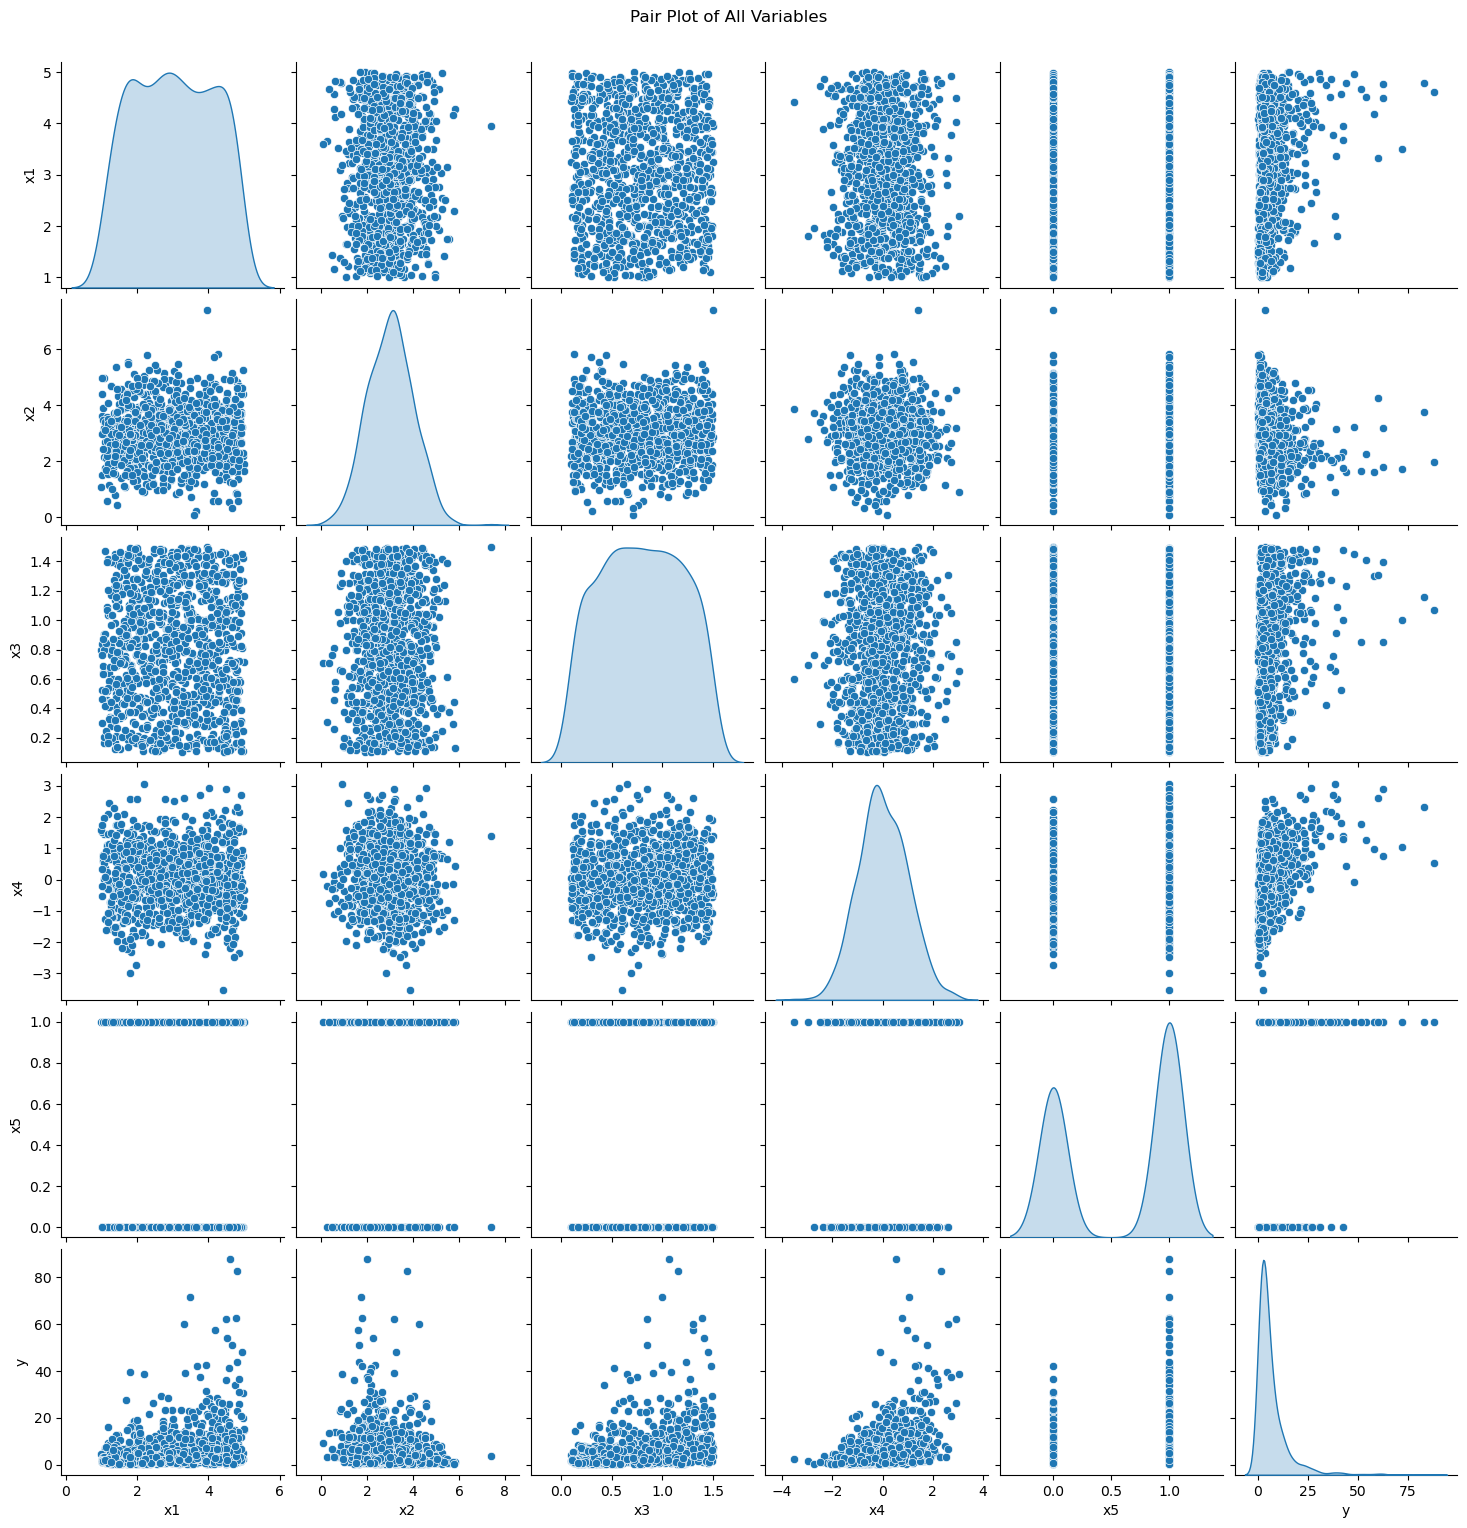

In [15]:
# Create pair plot for all variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

# Analysis of Data Characteristics and OLS Suitability

## 1. Is Y strictly positive and right-skewed?

Yes, Y is strictly positive and right-skewed:
- Minimum value is 0.105442 (strictly positive)
- Strong right skew evident from:
  - Mean (6.65) is much larger than median (3.69)
  - Long right tail in histogram
  - Many outliers in the box plot on the upper end
  - Distribution is clearly non-symmetric with a heavy right tail

## 2. Does the variance of Y appear to increase with the mean?

Yes, there is evidence of heteroscedasticity:
- In scatter plots, especially for x1, x3, and x4, the spread of Y values increases as the predictor values increase
- The box plot shows many outliers on the upper end
- The standard deviation (8.84) is larger than the mean (6.65), suggesting overdispersion
- The range of Y values widens at higher predictor values

## 3. Are the relationships between Y and the predictors nonlinear or multiplicative?

Yes, there are signs of nonlinear relationships:
- The scatter plots show patterns that deviate from linear trends
- The red regression lines don't capture the true relationship well
- Particularly visible in plots for x1, x3, and x4
- The relationship appears more multiplicative/exponential than linear

## Why OLS is Not Appropriate

OLS would be inappropriate for this data for several reasons:

1. **Violation of Normality Assumption**:
   - OLS assumes normally distributed errors
   - The response variable Y is heavily right-skewed
   - Normal Q-Q plots would show significant deviation from normality

2. **Heteroscedasticity**:
   - OLS assumes constant variance (homoscedasticity)
   - Clear evidence of increasing variance with the mean
   - Would lead to inefficient parameter estimates and invalid standard errors

3. **Non-negative Response**:
   - OLS can predict negative values
   - Y is strictly positive by nature
   - Gamma distribution naturally constrains predictions to positive values

4. **Non-linear Relationships**:
   - OLS assumes linear relationships
   - Data shows multiplicative/exponential patterns
   - Linear model would systematically misspecify the relationships

5. **Mean-Variance Relationship**:
   - OLS assumes independence between mean and variance
   - Data shows variance increasing with mean
   - Gamma regression naturally models this relationship

These characteristics suggest that Gamma regression with a log link would be more appropriate as it:
- Ensures positive predictions
- Handles right-skewed data
- Accounts for mean-variance relationship
- Better captures multiplicative effects through the log link

# Gamma Regression

In [ ]:
# 1. Import Required Libraries
import cvxpy as cp
from sklearn.preprocessing import StandardScaler

## 2. Load and Prepare Data

In [49]:
# Load the data
df = pd.read_csv('gamma.csv')

# Separate features (X) and target (y)
X = df[['x1', 'x2', 'x3', 'x4', 'x5']].values
y = df['y'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term
X_scaled = np.column_stack([np.ones(len(X_scaled)), X_scaled])

# Get dimensions
n, p = X_scaled.shape

## 3.1: Implement Gamma Regression using CVXPY

In [67]:
def fit_gamma_regression_cvxpy(X, y, nu=1.0, max_iter=1000):
    """
    Fit Gamma regression using CVXPY

    Parameters:
    X : array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target values
    nu : float
        Shape parameter for Gamma distribution
    max_iter : int
        Maximum number of iterations

    Returns:
    beta : array-like
        Estimated coefficients
    """

    # Initialize the parameter vector
    beta = cp.Variable(p)

    # Compute the negative log-likelihood
    X_beta = X @ beta
    exp_term = cp.exp(-X_beta)  # Exponential term
    # Element-wise multiplication using cp.multiply
    nll = nu * cp.sum(X_beta) + nu * cp.sum(cp.multiply(y, exp_term))

    # Add small regularization term for numerical stability
    reg_param = 1e-6
    regularization = reg_param * cp.sum_squares(beta)
    objective = nll + regularization

    # Define the optimization problem
    problem = cp.Problem(cp.Minimize(objective))

    # Solve the problem with SCS
    try:
        result = problem.solve(solver=cp.SCS,
                               max_iters=max_iter,
                               eps=1e-5,
                               verbose=True)

        if problem.status == 'optimal':
            return beta.value, result
        else:
            print(f"Problem status: {problem.status}")
            return None, None

    except cp.error.SolverError as e:
        print(f"Solver Error: {e}")
        return None, None


# Add diagnostic checks
print("Data diagnostics:")
print("Y range:", np.min(y), "-", np.max(y))
print("Y mean:", np.mean(y))
print("Y variance:", np.var(y))
print("Condition number of X:", np.linalg.cond(X_scaled))

Data diagnostics:
Y range: 0.1054419475067382 - 87.7502507834618
Y mean: 6.653052252886984
Y variance: 78.14695615414946
Condition number of X: 1.0737543181714089


(CVXPY) Jun 06 01:30:21 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 01:30:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 01:30:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 01:30:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 01:30:21 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 01:30:21 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 01:30:21 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 01:30:21 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 06 01:30:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 06 01:30:21 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 06 01:30:21 PM: Applying reduction SCS
(CVXPY) Jun 06 01:30:21 PM: Finished problem compilation (took 1.622e-

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 1006, constraints m: 3000
cones: 	  e: exp vars: 3000, dual exp vars: 0
settings: eps_abs: 1.0e-05, eps_rel:

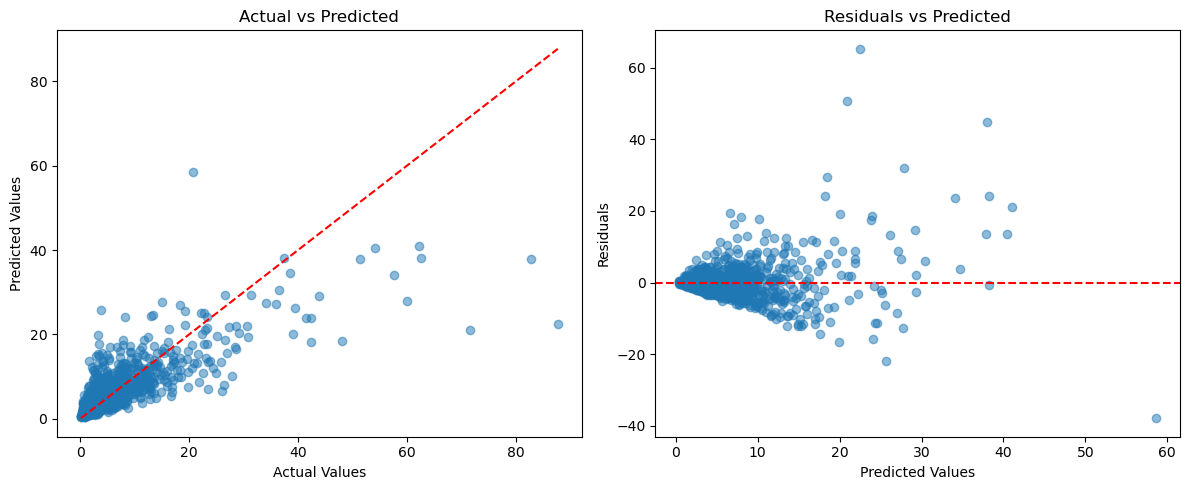

In [68]:
# Fit the model
beta_cvxpy, nll_value = fit_gamma_regression_cvxpy(X_scaled, y, nu=0.1)

if beta_cvxpy is not None:
    # Print results in a readable format
    print("\nOptimization Results:")
    print("=" * 50)
    print("\nOptimal coefficients (β):")
    print("-" * 30)
    coef_names = ['Intercept'] + [f'x{i}' for i in range(1, 6)]
    for name, coef in zip(coef_names, beta_cvxpy):
        print(f"{name:10} : {coef:10.4f}")

    print("\nModel Performance Metrics:")
    print("-" * 30)

    # Make predictions
    y_pred = np.exp(X_scaled @ beta_cvxpy)

    # Calculate metrics
    mse = np.mean((y - y_pred)**2)
    mae = np.mean(np.abs(y - y_pred))
    r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

    print(f"MSE      : {mse:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Add some visualization
    plt.figure(figsize=(12, 5))

    # Actual vs Predicted plot
    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')

    # Residuals plot
    plt.subplot(1, 2, 2)
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')

    plt.tight_layout()
    plt.show()

## 3.2: Implement Gamma Regression using Gradient Descent (Manual Implementation)

In [ ]:
def compute_gradient(X, y, beta, nu=1.0):
    """
    Compute the gradient of the negative log-likelihood

    Parameters:
    X : array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target values
    beta : array-like of shape (n_features,)
        Current parameter values
    nu : float
        Shape parameter for Gamma distribution

    Returns:
    gradient : array-like
        Gradient of the NLL with respect to beta
    """
    X_beta = X @ beta

    # Clip X_beta to avoid overflow in exp
    X_beta_clipped = np.clip(X_beta, -100, 100)
    exp_term = np.exp(-X_beta_clipped)

    # Gradient computation
    gradient = nu * (X.T @ np.ones(len(y)) - X.T @ (y * exp_term))
    # Clip gradient values to avoid explosion
    gradient = np.clip(gradient, -1e10, 1e10)

    return gradient


def compute_nll(X, y, beta, nu=1.0):
    """
    Compute the negative log-likelihood
    """
    X_beta = X @ beta

    # Clip values to avoid overflow
    X_beta_clipped = np.clip(X_beta, -100, 100)
    exp_term = np.exp(-X_beta_clipped)

    nll = nu * (np.sum(X_beta) + np.sum(y * exp_term))
    return nll

In [74]:
def gradient_descent(X, y, nu=1.0, max_iter=1000, tol=1e-6,
                     initial_lr=0.001, decay_rate=0.95, patience=10):
    """
    Implement gradient descent with learning rate scheduling

    Parameters:
    X : array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target values
    nu : float
        Shape parameter for Gamma distribution
    max_iter : int
        Maximum number of iterations
    tol : float
        Tolerance for stopping criterion
    initial_lr : float
        Initial learning rate
    decay_rate : float
        Learning rate decay factor
    patience : int
        Number of iterations to wait before reducing learning rate

    Returns:
    beta : array-like
        Optimal coefficients
    history : dict
        Optimization history
    """
    n, p = X.shape

    # Initialize parameters
    beta = np.random.rand(p) * 0.01
    lr = initial_lr

    # Initialize history
    history = {
        'nll': [],
        'grad_norm': [],
        'learning_rate': []
    }

    # Variables for learning rate scheduling
    best_nll = float('inf')
    no_improve_count = 0

    # Main optimization loop
    for iteration in range(max_iter):
        # Compute gradient
        gradient = compute_gradient(X, y, beta, nu)
        grad_norm = np.linalg.norm(gradient)

        # Update parameters with gradient clipping
        beta_new = beta - lr * np.clip(gradient, -1e3, 1e3)

        # Compute NLL
        try:
            current_nll = compute_nll(X, y, beta_new, nu)

            # Check for NaN or inf
            if np.isnan(current_nll) or np.isinf(current_nll):
                lr *= decay_rate
                print(
                    f"NaN/Inf encountered. Reducing learning rate to {lr:.6f}")
                continue

        except:
            lr *= decay_rate
            print(
                f"Error in NLL computation. Reducing learning rate to {lr:.6f}")
            continue

        # Store history
        history['nll'].append(current_nll)
        history['grad_norm'].append(grad_norm)
        history['learning_rate'].append(lr)

        # Learning rate scheduling
        if current_nll < best_nll - tol:
            best_nll = current_nll
            no_improve_count = 0
            beta = beta_new
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            lr *= decay_rate
            no_improve_count = 0
            print(f"Reducing learning rate to {lr:.6f}")

            # If learning rate becomes too small, stop
            if lr < 1e-10:
                print("Learning rate too small. Stopping...")
                break

        # Stopping criteria
        if grad_norm < tol:
            print(f"Converged after {iteration + 1} iterations!")
            break

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: NLL = {current_nll:.4f}, "
                  f"Gradient norm = {grad_norm:.4f}, Learning rate = {lr:.6f}")

    return beta, history

Iteration 0: NLL = 328.3801, Gradient norm = 799.5237, Learning rate = 0.001000
Reducing learning rate to 0.000950
Reducing learning rate to 0.000902
Reducing learning rate to 0.000857
Reducing learning rate to 0.000815
Reducing learning rate to 0.000774
Reducing learning rate to 0.000735
Reducing learning rate to 0.000698
Iteration 100: NLL = 252.7089, Gradient norm = 0.0932, Learning rate = 0.000698
Reducing learning rate to 0.000663
Reducing learning rate to 0.000630
Reducing learning rate to 0.000599
Reducing learning rate to 0.000569
Reducing learning rate to 0.000540
Reducing learning rate to 0.000513
Reducing learning rate to 0.000488
Reducing learning rate to 0.000463
Reducing learning rate to 0.000440
Reducing learning rate to 0.000418
Reducing learning rate to 0.000397
Reducing learning rate to 0.000377
Reducing learning rate to 0.000358
Reducing learning rate to 0.000341
Reducing learning rate to 0.000324
Reducing learning rate to 0.000307
Reducing learning rate to 0.000292


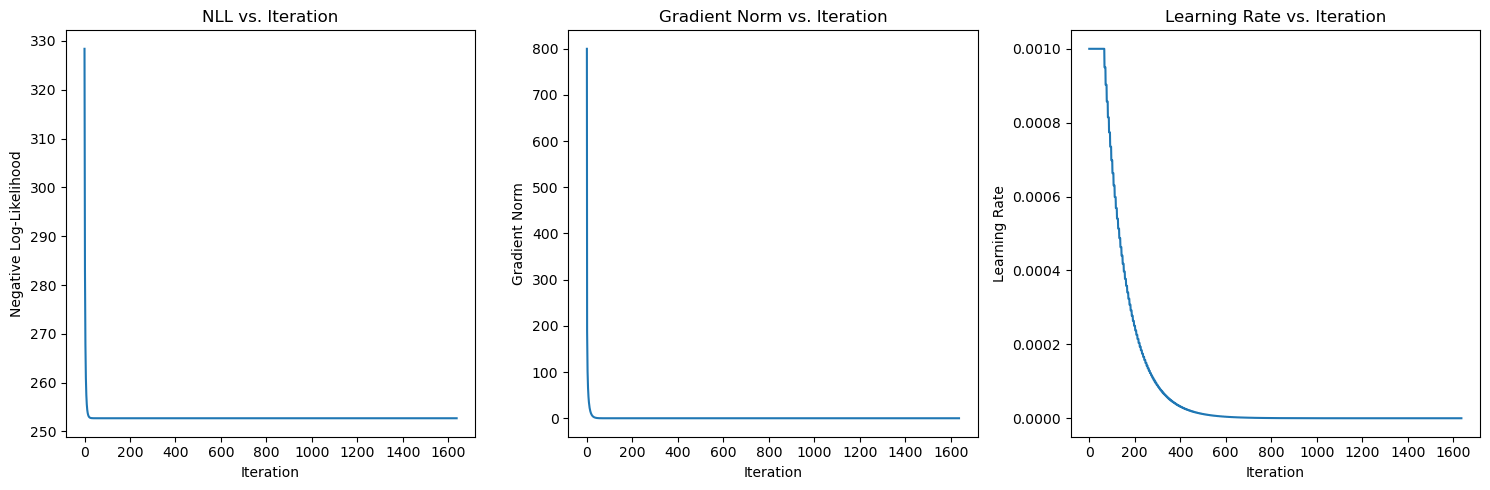


Comparison with CVXPY results:
------------------------------
Parameter  : GD Value  : CVXPY Value
------------------------------
Intercept  :     1.5262 :     1.5271
x1         :     0.3341 :     0.3341
x2         :    -0.2849 :    -0.2849
x3         :     0.3709 :     0.3709
x4         :     0.4826 :     0.4826
x5         :     0.3690 :     0.3691


In [75]:
# Set random seed for reproducibility
np.random.seed(42)

# Fit the model using gradient descent
beta_gd, history = gradient_descent(
    X_scaled,
    y,
    nu=0.1,
    initial_lr=0.001,
    decay_rate=0.95,
    patience=5,
    tol=1e-5,
    max_iter=2000
)
# Print results
print("\nGradient Descent Results:")
print("=" * 50)
print("\nOptimal coefficients (β):")
print("-" * 30)
coef_names = ['Intercept'] + [f'x{i}' for i in range(1, 6)]
for name, coef in zip(coef_names, beta_gd):
    print(f"{name:10} : {coef:10.4f}")

# Make predictions
y_pred = np.exp(X_scaled @ beta_gd)

# Calculate metrics
mse = np.mean((y - y_pred)**2)
mae = np.mean(np.abs(y - y_pred))
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print("\nModel Performance Metrics:")
print("-" * 30)
print(f"MSE      : {mse:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize optimization history

plt.figure(figsize=(15, 5))

# Plot NLL history
plt.subplot(1, 3, 1)
plt.plot(history['nll'])
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.title('NLL vs. Iteration')

# Plot gradient norm history
plt.subplot(1, 3, 2)
plt.plot(history['grad_norm'])
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs. Iteration')

# Plot learning rate history
plt.subplot(1, 3, 3)
plt.plot(history['learning_rate'])
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs. Iteration')

plt.tight_layout()
plt.show()

# Compare with cvxpy results
print("\nComparison with CVXPY results:")
print("-" * 30)
print("Parameter  : GD Value  : CVXPY Value")
print("-" * 30)
for name, gd_coef, cvx_coef in zip(coef_names, beta_gd, beta_cvxpy):
    print(f"{name:10} : {gd_coef:10.4f} : {cvx_coef:10.4f}")

## 3.3: Implement Gamma Regression using Newton-Raphson Method (Manual Implementation)

In [76]:
def compute_hessian(X, y, beta, nu=1.0):
    """
    Compute the Hessian matrix of the negative log-likelihood

    The Hessian is: nu * X.T @ diag(y * exp(-X@beta)) @ X
    """
    X_beta = X @ beta
    X_beta_clipped = np.clip(X_beta, -100, 100)
    exp_term = np.exp(-X_beta_clipped)

    # Compute diagonal matrix elements
    diag_elements = y * exp_term

    # Compute Hessian using efficient matrix operations
    hessian = nu * X.T @ (diag_elements.reshape(-1, 1) * X)

    return hessian

In [77]:
def newton_raphson(X, y, nu=1.0, max_iter=100, tol=1e-6):
    """
    Implement Newton-Raphson optimization

    Parameters:
    X : array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target values
    nu : float
        Shape parameter for Gamma distribution
    max_iter : int
        Maximum number of iterations
    tol : float
        Tolerance for stopping criterion

    Returns:
    beta : array-like
        Optimal coefficients
    history : dict
        Optimization history
    """
    n, p = X.shape

    # Initialize parameters with small random values
    beta = np.random.randn(p) * 0.01

    # Initialize history
    history = {
        'nll': [],
        'grad_norm': [],
        'step_size': []
    }

    for iteration in range(max_iter):
        try:
            # Compute gradient
            gradient = compute_gradient(X, y, beta, nu)
            grad_norm = np.linalg.norm(gradient)

            # Compute Hessian
            hessian = compute_hessian(X, y, beta, nu)

            # Add small regularization to Hessian for numerical stability
            hessian = hessian + 1e-8 * np.eye(p)

            # Compute Newton step
            try:
                step = np.linalg.solve(hessian, gradient)
            except np.linalg.LinAlgError:
                # If Hessian is singular, use pseudoinverse
                step = np.linalg.pinv(hessian) @ gradient

            # Compute step size using backtracking line search
            step_size = 1.0
            alpha = 0.5  # Control parameter for backtracking
            beta_new = beta - step_size * step
            nll_new = compute_nll(X, y, beta_new, nu)
            nll_current = compute_nll(X, y, beta, nu)

            while nll_new > nll_current and step_size > 1e-10:
                step_size *= alpha
                beta_new = beta - step_size * step
                nll_new = compute_nll(X, y, beta_new, nu)

            # Update parameters
            beta = beta_new

            # Store history
            history['nll'].append(nll_new)
            history['grad_norm'].append(grad_norm)
            history['step_size'].append(step_size)

            # Print progress
            if iteration % 10 == 0:
                print(f"Iteration {iteration}: NLL = {nll_new:.4f}, "
                      f"Gradient norm = {grad_norm:.4f}, "
                      f"Step size = {step_size:.6f}")

            # Check convergence
            if grad_norm < tol:
                print(f"Converged after {iteration + 1} iterations!")
                break

        except Exception as e:
            print(f"Error in iteration {iteration}: {str(e)}")
            break

    return beta, history

Iteration 0: NLL = 359.1230, Gradient norm = 803.7938, Step size = 1.000000
Converged after 8 iterations!

Newton-Raphson Results:

Optimal coefficients (β):
------------------------------
Intercept  :     1.5271
x1         :     0.3341
x2         :    -0.2850
x3         :     0.3709
x4         :     0.4826
x5         :     0.3691

Model Performance Metrics:
------------------------------
MSE      : 30.4680
MAE      : 2.9075
R-squared: 0.6101


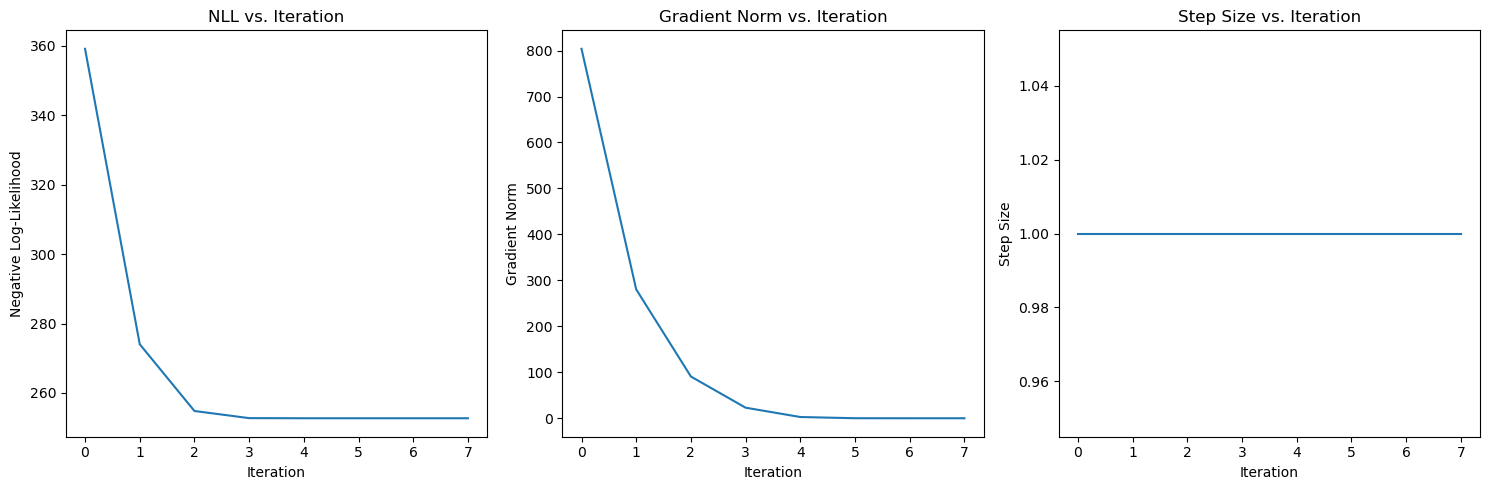


Comparison of all methods:
--------------------------------------------------
Parameter  : NR Value  : GD Value  : CVXPY Value
--------------------------------------------------
Intercept  :     1.5271 :     1.5262 :     1.5271
x1         :     0.3341 :     0.3341 :     0.3341
x2         :    -0.2850 :    -0.2849 :    -0.2849
x3         :     0.3709 :     0.3709 :     0.3709
x4         :     0.4826 :     0.4826 :     0.4826
x5         :     0.3691 :     0.3690 :     0.3691


In [78]:
# Set random seed for reproducibility
np.random.seed(42)

# Fit the model using Newton-Raphson
beta_nr, history = newton_raphson(X_scaled, y, nu=0.1)

# Print results
print("\nNewton-Raphson Results:")
print("=" * 50)
print("\nOptimal coefficients (β):")
print("-" * 30)
coef_names = ['Intercept'] + [f'x{i}' for i in range(1, 6)]
for name, coef in zip(coef_names, beta_nr):
    print(f"{name:10} : {coef:10.4f}")

# Make predictions
y_pred = np.exp(X_scaled @ beta_nr)

# Calculate metrics
mse = np.mean((y - y_pred)**2)
mae = np.mean(np.abs(y - y_pred))
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print("\nModel Performance Metrics:")
print("-" * 30)
print(f"MSE      : {mse:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize optimization history
plt.figure(figsize=(15, 5))

# Plot NLL history
plt.subplot(1, 3, 1)
plt.plot(history['nll'])
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.title('NLL vs. Iteration')

# Plot gradient norm history
plt.subplot(1, 3, 2)
plt.plot(history['grad_norm'])
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs. Iteration')

# Plot step size history
plt.subplot(1, 3, 3)
plt.plot(history['step_size'])
plt.xlabel('Iteration')
plt.ylabel('Step Size')
plt.title('Step Size vs. Iteration')

plt.tight_layout()
plt.show()

# Compare with previous results
print("\nComparison of all methods:")
print("-" * 50)
print("Parameter  : NR Value  : GD Value  : CVXPY Value")
print("-" * 50)
for name, nr_coef, gd_coef, cvx_coef in zip(coef_names, beta_nr, beta_gd, beta_cvxpy):
    print(f"{name:10} : {nr_coef:10.4f} : {gd_coef:10.4f} : {cvx_coef:10.4f}")

## 3.4 Built-in Library Comparison:

In [79]:
import statsmodels.api as sm

# Add intercept term for statsmodels
X_scaled_sm = sm.add_constant(X_scaled)

# Fit the model using statsmodels
model = sm.GLM(y, X_scaled_sm, family=sm.families.Gamma(link=sm.families.links.log()))
result = model.fit()

# Print summary
print("\nStatsmodels Summary:")
print("=" * 80)
print(result.summary())

# Extract coefficients
beta_sm = result.params

# Make predictions
y_pred_sm = np.exp(X_scaled_sm @ beta_sm)

# Calculate metrics
mse_sm = np.mean((y - y_pred_sm)**2)
mae_sm = np.mean(np.abs(y - y_pred_sm))
r2_sm = 1 - np.sum((y - y_pred_sm)**2) / np.sum((y - np.mean(y))**2)

print("\nStatsmodels Model Performance Metrics:")
print("-" * 40)
print(f"MSE      : {mse_sm:.4f}")
print(f"MAE      : {mae_sm:.4f}")
print(f"R-squared: {r2_sm:.4f}")

/home/ahmadreza-farvardin/miniconda3/envs/firstenv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(



Statsmodels Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      994
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                         0.33541
Method:                          IRLS   Log-Likelihood:                -2268.6
Date:                Fri, 06 Jun 2025   Deviance:                       344.16
Time:                        14:27:54   Pearson chi2:                     333.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.8886
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5271      0.0

# Evaluation and Comparison:

In [84]:
from sklearn.model_selection import KFold
import time
from typing import Tuple, Dict, List, Callable
from dataclasses import dataclass


@dataclass
class ModelResults:
    """Class for storing model evaluation results"""
    name: str
    rmse_scores: List[float]
    adj_r2_scores: List[float]
    computation_times: List[float]

In [85]:
def adjusted_r2(y_true: np.ndarray, y_pred: np.ndarray, n_features: int) -> float:
    """
    Calculate adjusted R-squared

    Parameters:
    -----------
    y_true : array-like
        Actual target values
    y_pred : array-like
        Predicted target values
    n_features : int
        Number of features (excluding intercept)

    Returns:
    --------
    float
        Adjusted R-squared value
    """
    n = len(y_true)
    r2 = 1 - np.sum((y_true - y_pred)**2) / \
        np.sum((y_true - np.mean(y_true))**2)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adj_r2


def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Calculate Root Mean Squared Error"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [86]:
def prepare_data(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Standardize features and add intercept

    Parameters:
    -----------
    X : array-like
        Feature matrix
    y : array-like
        Target values

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray]
        Processed X and y
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = sm.add_constant(X_scaled)
    return X_scaled, y


In [93]:
def fit_predict_statsmodels(X_train: np.ndarray, y_train: np.ndarray,
                            X_test: np.ndarray) -> np.ndarray:
    """Fit and predict using statsmodels GLM"""
    model = sm.GLM(y_train, X_train, family=sm.families.Gamma(
        link=sm.families.links.log()))
    result = model.fit()
    return np.exp(X_test @ result.params)


def fit_predict_cvxpy(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, nu: float = 0.1) -> np.ndarray:
    """Fit and predict using CVXPY implementation"""
    beta_cvxpy, _ = fit_gamma_regression_cvxpy(X_train, y_train, nu)
    return np.exp(X_test @ beta_cvxpy)


def fit_predict_newton_raphson(X_train: np.ndarray, y_train: np.ndarray,
                               X_test: np.ndarray, nu: float = 0.1) -> np.ndarray:
    """Fit and predict using Newton-Raphson implementation"""
    beta_nr, _ = newton_raphson(X_train, y_train, nu)
    return np.exp(X_test @ beta_nr)


def fit_predict_gradient_descent(X_train: np.ndarray, y_train: np.ndarray,
                               X_test: np.ndarray, nu: float = 0.1) -> np.ndarray:
    """Fit and predict using Newton-Raphson implementation"""
    beta_gd, _ = gradient_descent(X_train, y_train, nu)
    return np.exp(X_test @ beta_gd)

In [88]:
def cross_validate_model(X: np.ndarray, y: np.ndarray,
                         fit_predict_func: Callable,
                         model_name: str) -> ModelResults:
    """
    Perform 10-fold cross-validation for a given model

    Parameters:
    -----------
    X : array-like
        Feature matrix
    y : array-like
        Target values
    fit_predict_func : callable
        Function that fits model and returns predictions
    model_name : str
        Name of the model for results

    Returns:
    --------
    ModelResults
        Cross-validation results
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []
    adj_r2_scores = []
    computation_times = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Time the fitting and prediction
        start_time = time.time()
        y_pred = fit_predict_func(X_train, y_train, X_test)
        computation_time = time.time() - start_time

        # Calculate metrics
        rmse_score = rmse(y_test, y_pred)
        adj_r2_score = adjusted_r2(
            y_test, y_pred, X.shape[1]-1)  # -1 for intercept

        rmse_scores.append(rmse_score)
        adj_r2_scores.append(adj_r2_score)
        computation_times.append(computation_time)

        print(f"{model_name} - Fold {fold_idx+1}/10 - "
              f"RMSE: {rmse_score:.4f}, Adj R²: {adj_r2_score:.4f}, "
              f"Time: {computation_time:.4f}s")

    return ModelResults(
        name=model_name,
        rmse_scores=rmse_scores,
        adj_r2_scores=adj_r2_scores,
        computation_times=computation_times
    )

In [94]:
def evaluate_all_models(X: np.ndarray, y: np.ndarray) -> List[ModelResults]:
    """
    Evaluate all models using cross-validation

    Parameters:
    -----------
    X : array-like
        Feature matrix
    y : array-like
        Target values

    Returns:
    --------
    List[ModelResults]
        Results for all models
    """
    # Prepare data
    X_scaled, y = prepare_data(X, y)

    # Define models to evaluate
    models = [
        (fit_predict_statsmodels, "Statsmodels GLM"),
        (fit_predict_cvxpy, "CVXPY"),
        (fit_predict_gradient_descent, "Gradient Descent"),
        (fit_predict_newton_raphson, "Newton-Raphson")
    ]

    # Evaluate each model
    results = []
    for fit_predict_func, model_name in models:
        print(f"\nEvaluating {model_name}...")
        model_results = cross_validate_model(
            X_scaled, y, fit_predict_func, model_name)
        results.append(model_results)

    return results

In [97]:
def plot_comparison(results: List[ModelResults]):
    """
    Plot comparison of model performances

    Parameters:
    -----------
    results : List[ModelResults]
        Results for all models
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Prepare data for box plots
    metrics = {
        'RMSE': [r.rmse_scores for r in results],
        'Adjusted R²': [r.adj_r2_scores for r in results],
        'Computation Time (s)': [r.computation_times for r in results]
    }

    for ax, (metric_name, metric_values) in zip(axes, metrics.items()):
        ax.boxplot(metric_values, labels=[r.name for r in results])
        ax.set_title(metric_name)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


def print_summary(results: List[ModelResults]):
    """
    Print summary statistics for all models

    Parameters:
    -----------
    results : List[ModelResults]
        Results for all models
    """
    print("\nSummary Statistics:")
    print("=" * 80)
    print(f"{'Model':<15} {'RMSE (mean ± std)':<25} {'Adj R² (mean ± std)':<25} {'Time (mean ± std)':<25}")
    print("-" * 80)

    for r in results:
        rmse_mean, rmse_std = np.mean(r.rmse_scores), np.std(r.rmse_scores)
        r2_mean, r2_std = np.mean(r.adj_r2_scores), np.std(r.adj_r2_scores)
        time_mean, time_std = np.mean(
            r.computation_times), np.std(r.computation_times)

        print(f"{r.name:<15} {rmse_mean:>8.4f} ± {rmse_std:<12.4f} "
              f"{r2_mean:>8.4f} ± {r2_std:<12.4f} "
              f"{time_mean:>8.4f} ± {time_std:<12.4f}")


Evaluating Statsmodels GLM...
Statsmodels GLM - Fold 1/10 - RMSE: 5.0471, Adj R²: 0.6137, Time: 0.0271s
Statsmodels GLM - Fold 2/10 - RMSE: 7.1271, Adj R²: 0.6858, Time: 0.0183s
Statsmodels GLM - Fold 3/10 - RMSE: 7.4792, Adj R²: 0.4198, Time: 0.0252s
Statsmodels GLM - Fold 4/10 - RMSE: 4.2425, Adj R²: 0.0109, Time: 0.0273s
Statsmodels GLM - Fold 5/10 - RMSE: 3.4203, Adj R²: 0.7150, Time: 0.0249s
Statsmodels GLM - Fold 6/10 - RMSE: 7.2175, Adj R²: 0.5578, Time: 0.0193s
Statsmodels GLM - Fold 7/10 - RMSE: 4.3967, Adj R²: 0.6503, Time: 0.0201s
Statsmodels GLM - Fold 8/10 - RMSE: 3.6727, Adj R²: 0.4760, Time: 0.0225s


/home/ahmadreza-farvardin/miniconda3/envs/firstenv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
(CVXPY) Jun 06 02:57:52 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:52 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:52 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS


(CVXPY) Jun 06 02:57:52 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 06 02:57:52 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 06 02:57:52 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 06 02:57:52 PM: Applying reduction SCS
(CVXPY) Jun 06 02:57:52 PM: Finished problem compilation (took 2.349e-02 seconds).
(CVXPY) Jun 06 02:57:52 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jun 06 02:57:52 PM: Problem status: optimal
(CVXPY) Jun 06 02:57:52 PM: Optimal value: 2.275e+02
(CVXPY) Jun 06 02:57:52 PM: Compilation took 2.349e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Solver (including time spent in interface) took 1.129e-01 seconds
(CVXPY) Jun 06 02:57:52 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:52 PM: CVXPY will firs

Statsmodels GLM - Fold 9/10 - RMSE: 5.8338, Adj R²: 0.6482, Time: 0.0164s
Statsmodels GLM - Fold 10/10 - RMSE: 5.4904, Adj R²: 0.4093, Time: 0.0117s

Evaluating CVXPY...
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------

(CVXPY) Jun 06 02:57:52 PM: Problem status: optimal
(CVXPY) Jun 06 02:57:52 PM: Optimal value: 2.259e+02
(CVXPY) Jun 06 02:57:52 PM: Compilation took 2.159e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Solver (including time spent in interface) took 1.029e-01 seconds
(CVXPY) Jun 06 02:57:52 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:52 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:52 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 02:57:52 PM: Applying reduct

----------------------
     0| 2.05e+02  8.95e+01  2.36e+04 -1.17e+04  1.00e-01  9.99e-03 
   125| 7.35e-06  4.26e-04  1.33e-04  2.26e+02  9.08e-01  1.02e-01 
------------------------------------------------------------------
status:  solved
timings: total: 1.02e-01s = setup: 7.78e-03s + solve: 9.41e-02s
	 lin-sys: 1.30e-02s, cones: 7.49e-02s, accel: 5.20e-04s
------------------------------------------------------------------
objective = 225.887475
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
CVXPY - Fold 2/10 - RMSE: 7.1272, Adj R²: 0.6858, Time: 0.1362s
                                     CVXPY                                     
                                     v1.6.6                                    
----------------

(CVXPY) Jun 06 02:57:52 PM: Optimal value: 2.274e+02
(CVXPY) Jun 06 02:57:52 PM: Compilation took 1.832e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Solver (including time spent in interface) took 7.969e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:52 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:52 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 02:57:52 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 06 02:57:52 PM: Applying re

CVXPY - Fold 3/10 - RMSE: 7.4792, Adj R²: 0.4198, Time: 0.1058s
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 906, constraints m: 2700
cones: 	  e: exp va

(CVXPY) Jun 06 02:57:52 PM: Problem status: optimal
(CVXPY) Jun 06 02:57:52 PM: Optimal value: 2.275e+02
(CVXPY) Jun 06 02:57:52 PM: Compilation took 1.760e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Solver (including time spent in interface) took 7.639e-02 seconds
(CVXPY) Jun 06 02:57:52 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:52 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:52 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 02:57:52 PM: Applying reduct

   125| 7.62e-06  4.04e-04  7.62e-05  2.28e+02  7.67e-01  7.49e-02 
------------------------------------------------------------------
status:  solved
timings: total: 7.49e-02s = setup: 4.70e-03s + solve: 7.02e-02s
	 lin-sys: 9.02e-03s, cones: 5.82e-02s, accel: 3.57e-04s
------------------------------------------------------------------
objective = 227.529128
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
CVXPY - Fold 5/10 - RMSE: 3.4203, Adj R²: 0.7150, Time: 0.1023s
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                           

(CVXPY) Jun 06 02:57:53 PM: Problem status: optimal
(CVXPY) Jun 06 02:57:53 PM: Optimal value: 2.286e+02
(CVXPY) Jun 06 02:57:53 PM: Compilation took 1.812e-02 seconds
(CVXPY) Jun 06 02:57:53 PM: Solver (including time spent in interface) took 7.965e-02 seconds
(CVXPY) Jun 06 02:57:53 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:53 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:53 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:53 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:53 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:53 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:53 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 02:57:53 PM: Applying reduct

   125| 1.54e-05  5.40e-04  1.08e-04  2.29e+02  7.24e-01  7.85e-02 
------------------------------------------------------------------
status:  solved
timings: total: 7.86e-02s = setup: 5.32e-03s + solve: 7.33e-02s
	 lin-sys: 9.43e-03s, cones: 6.05e-02s, accel: 3.29e-04s
------------------------------------------------------------------
objective = 228.618187
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
CVXPY - Fold 7/10 - RMSE: 4.3967, Adj R²: 0.6503, Time: 0.1081s
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                           

(CVXPY) Jun 06 02:57:53 PM: Problem status: optimal
(CVXPY) Jun 06 02:57:53 PM: Optimal value: 2.269e+02
(CVXPY) Jun 06 02:57:53 PM: Compilation took 1.952e-02 seconds
(CVXPY) Jun 06 02:57:53 PM: Solver (including time spent in interface) took 7.227e-02 seconds
(CVXPY) Jun 06 02:57:53 PM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 06 02:57:53 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 06 02:57:53 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 06 02:57:53 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 06 02:57:53 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 06 02:57:53 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 06 02:57:53 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jun 06 02:57:53 PM: Applying reduct

   125| 7.12e-06  4.40e-04  7.58e-05  2.27e+02  8.33e-01  7.10e-02 
------------------------------------------------------------------
status:  solved
timings: total: 7.10e-02s = setup: 5.46e-03s + solve: 6.56e-02s
	 lin-sys: 8.28e-03s, cones: 5.46e-02s, accel: 2.91e-04s
------------------------------------------------------------------
objective = 226.946087
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
CVXPY - Fold 9/10 - RMSE: 5.8339, Adj R²: 0.6482, Time: 0.0997s
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                           

/tmp/ipykernel_29771/363250647.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metric_values, labels=[r.name for r in results])
/tmp/ipykernel_29771/363250647.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metric_values, labels=[r.name for r in results])
/tmp/ipykernel_29771/363250647.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metric_values, labels=[r.name for r in results])


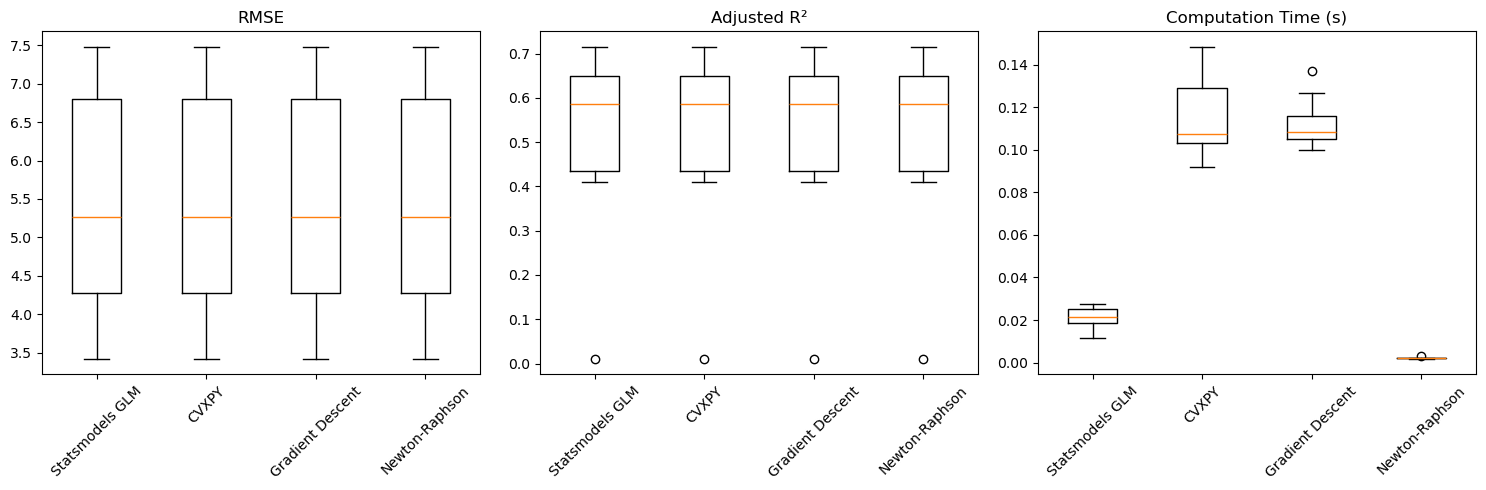


Summary Statistics:
Model           RMSE (mean ± std)         Adj R² (mean ± std)       Time (mean ± std)        
--------------------------------------------------------------------------------
Statsmodels GLM   5.3927 ± 1.4205         0.5187 ± 0.1981         0.0213 ± 0.0048      
CVXPY             5.3927 ± 1.4205         0.5187 ± 0.1981         0.1144 ± 0.0177      
Gradient Descent   5.3931 ± 1.4211         0.5187 ± 0.1979         0.1124 ± 0.0110      
Newton-Raphson    5.3927 ± 1.4205         0.5187 ± 0.1981         0.0021 ± 0.0003      


In [98]:
# Load and run evaluation
# Load data
df = pd.read_csv('gamma.csv')
X = df[['x1', 'x2', 'x3', 'x4', 'x5']].values
y = df['y'].values
# Run evaluation
results = evaluate_all_models(X, y)
# Plot results
plot_comparison(results)
# Print summary
print_summary(results)